In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [3]:
import pandas as ps

In [4]:
data = ps.read_csv("../data/multiphase/results.csv")
f_escape = ps.read_csv("../data/multiphase/fesc_clumpy.csv")

In [5]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,860.619135,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,52.347079,52.405229,403.213443,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,960.596762,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,27.264105,27.270420,230.905401,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,38.638837,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,355.792811,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,28.564707,28.462385,205.757975,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,593.984932,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,52.302395,51.810935,398.557600,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,1062.118310,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,75.712417,75.430875,608.059750,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,18551.424190,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,99.997650,99.964350,799.663300,0.099932


In [6]:
f_escape.describe()

,fesc_ion,fesc_lya
count,2.488000e+03,2488.000000
mean,3.685580e-02,0.601677
std,6.217918e-02,0.301803
min,1.789721e-51,0.003388
25%,4.061992e-03,0.349413
50%,1.199195e-02,0.662721
75%,3.762593e-02,0.881001
max,4.642314e-01,0.998857


In [12]:
n_best  = 80
chisq = data.chisq
min_chisq = chisq.min()
n_freedom = 107
chisq_limit = min_chisq + n_freedom*0.5
sorted_id = argsort(chisq)
ii = chisq < chisq_limit
print chisq_limit
best_models = data.loc[ii]
f_esc_best_models = f_escape.loc[ii]
print chisq[ii]
print len(chisq[ii])

92.1388365616
9       87.718832
216     86.419536
295     67.913657
346     84.501631
358     79.714706
479     81.436941
539     88.834443
546     53.315136
685     68.691086
687     79.648420
692     78.667847
791     38.638837
977     47.331794
995     63.993050
1219    62.468029
1222    90.405399
1223    84.124880
1224    81.786787
1244    66.428234
1289    75.936072
1321    89.137152
1438    73.078329
1486    88.257806
1515    73.449075
1613    72.464969
1835    68.765021
1847    74.459831
1875    87.026138
2027    62.826131
2250    75.759094
2379    58.843287
2423    77.275136
Name: chisq, dtype: float64
32


In [13]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.0,32.0,...,32.0,32.000000,3.200000e+01,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000
mean,1157.656250,1775.147159,0.638364,9.318912e+06,19615.710813,0.290055,1.752188,74.041165,0.0,5000.0,...,123456.0,1157.656250,2.354787e-08,0.843685,99.998622,5000.0,71.053995,58.034365,73.478279,0.015520
std,657.487329,724.919289,0.294042,9.599382e+06,11104.235785,0.280655,0.415286,12.696475,0.0,0.0,...,0.0,657.487329,4.281860e-08,0.871195,47.339045,0.0,13.351766,27.703416,61.221718,0.021548
min,9.000000,566.349100,0.066267,3.429846e+05,5914.170000,0.036967,1.100000,38.638837,0.0,5000.0,...,123456.0,9.000000,1.633967e-12,0.032025,30.465330,5000.0,38.142360,11.162080,1.565285,0.000118
25%,650.250000,1177.948250,0.400274,2.686826e+06,8710.763750,0.087726,1.352500,67.542302,0.0,5000.0,...,123456.0,650.250000,7.854648e-11,0.206835,62.599255,5000.0,63.095945,35.343832,25.396700,0.000697
50%,1222.500000,1794.375500,0.772282,5.423312e+06,20763.680000,0.164882,1.770000,75.847583,0.0,5000.0,...,123456.0,1222.500000,1.813864e-09,0.522595,92.119705,5000.0,70.753890,55.654155,54.824225,0.004006
75%,1539.500000,2325.776750,0.868628,1.561834e+07,26931.032500,0.413491,2.105000,84.219068,0.0,5000.0,...,123456.0,1539.500000,2.670905e-08,1.328985,127.352650,5000.0,78.354315,80.094490,95.188252,0.026640
max,2423.000000,2977.269000,0.996017,4.237722e+07,48698.780000,0.909925,2.350000,90.405399,0.0,5000.0,...,123456.0,2423.000000,1.831043e-07,2.960838,198.651900,5000.0,96.859500,99.852490,235.987400,0.072273


In [14]:
f_esc_best_models.describe()

,fesc_ion,fesc_lya
count,32.000000,32.000000
mean,0.014889,0.556113
std,0.046454,0.312089
min,0.000172,0.049253
25%,0.002771,0.262628
50%,0.005449,0.601086
75%,0.011375,0.811217
max,0.267885,0.983714


5 0.658935850313 0.431382811439
10 0.814272933152 0.624953430181
15 0.882196765663 0.716884131615


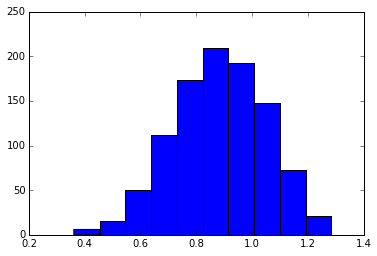

In [15]:
n_items = [5,10,15]

for n_i in n_items:
    n_try = 1000
    frac = np.zeros(n_try)
    for i in range(n_try):
        x_all = np.linspace(0.0,1.0,2500)
        x_some = random.random(n_i)
        q_all  = percentile(x_all, q=[16,50,84])
        q_some = percentile(x_some, q=[16,50,84])
        frac[i] = (q_some[2]-q_some[0])/(q_all[2]-q_all[0])
    print n_i, mean(frac), mean(frac) - std(frac)
a = hist(frac)


In [16]:
def plot_distros(fullsample, subsample, chi2sub, labelx):
    fig = plt.figure(1, figsize=(11,5))
    plt.clf()

    #plt.set_ticklabels(ax, size=35)
    n_full = len(fullsample)
    n_sub = len(subsample)
    #print type(fullsample)
    #print fullsample
    int_full = linspace(0.0,1.0,n_full)
    int_sub = linspace(0.0, 1.0, n_sub)
   
    plt.subplot(121)
    plt.plot(sort(fullsample), int_full ,label=r'${\rm Full\ Sample}$')
    plt.plot(sort(subsample), int_sub, label=r'${\rm Best\ Sample}$')
    plt.legend(loc=2, prop={'size':20})
    
    ax = plt.gca()
    set_ticklabels(ax, size=15)
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'${\rm Integrated\ Distribution}$', fontsize=20)
    
    plt.subplot(122)
    plt.scatter(subsample, chi2sub)
    
    ax = plt.gca()
    set_ticklabels(ax, size=15)
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'$\chi^2$', fontsize=20)
    
    plt.savefig(labelx+'.png')
    plt.show(fig)
    plt.close(fig)

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


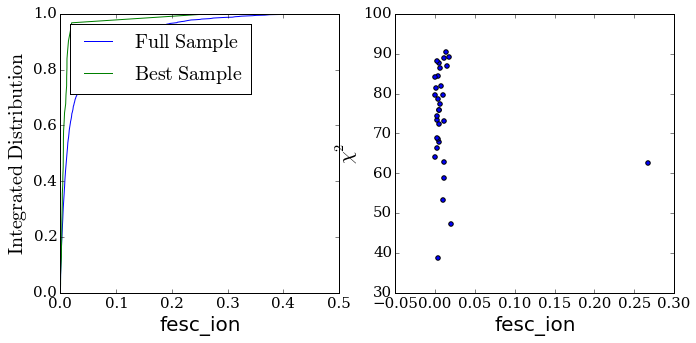

[ 0.20886098  0.54491153  1.20281256]


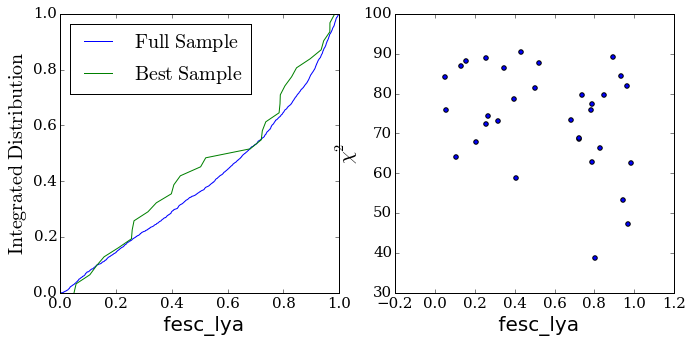

In [17]:
plot_distros(f_escape['fesc_ion'].values, f_esc_best_models['fesc_ion'].values,
                     best_models['chisq'].values, 'fesc_ion')
best_q =  f_esc_best_models['fesc_ion'].quantile([0.16,0.50,0.84])
print best_q.values * 100
plot_distros(f_escape[' fesc_lya'].values, f_esc_best_models[' fesc_lya'].values,
                     best_models['chisq'].values, ' fesc_lya')

----
H_em
0.875799393021
[ 1135.6203   1794.3755   2626.77436]


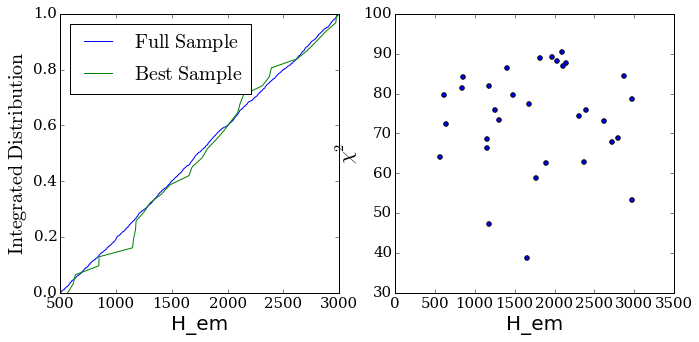

----
P_cl
0.856556666669
[ 0.33503442  0.7722822   0.92086156]


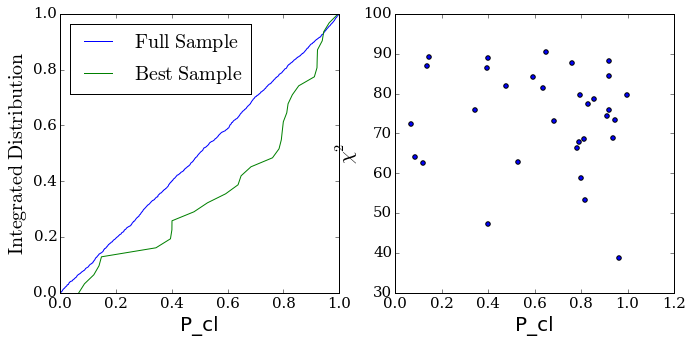

----
T_ICM
0.810422845773
[ 6.03170367  6.73426455  7.24634127]


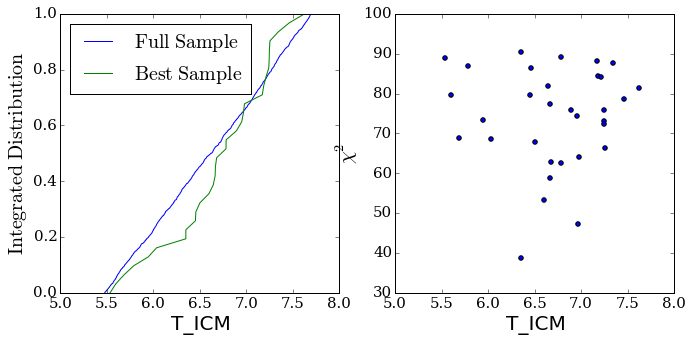

----
T_cl
0.910950433955
[ 3.89090635  4.31730433  4.5050795 ]


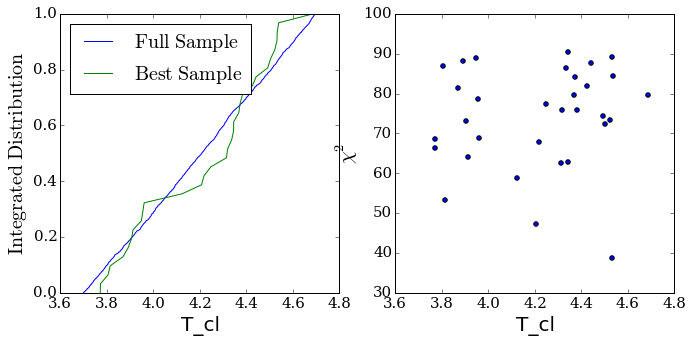

----
beta_cl
1.03166666667
[ 1.2096  1.77    2.2   ]


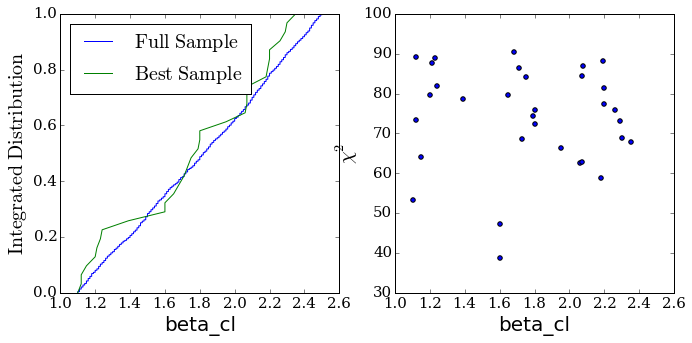

----
f_cl
0.77633684288
[ 3.08700867  4.70777573  6.89958623]


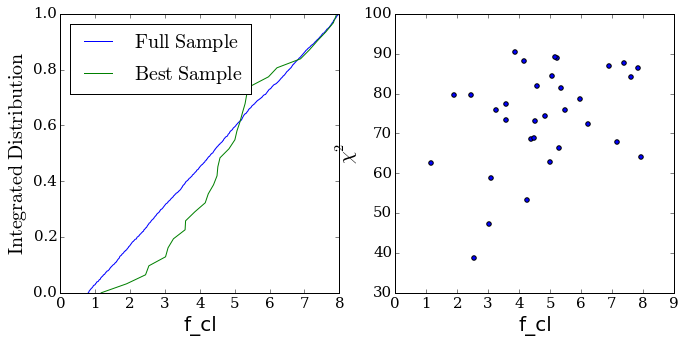

----
n_HI_ICM
0.929274197355
[-10.9681448   -8.7413954   -7.16445929]


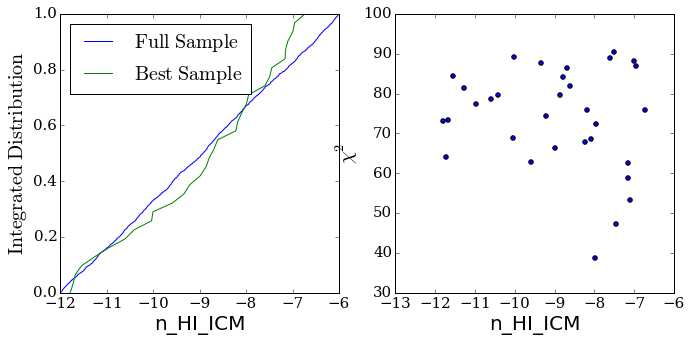

----
n_HI_cl
0.87754384521
[-0.9426244  -0.28183508  0.23858552]


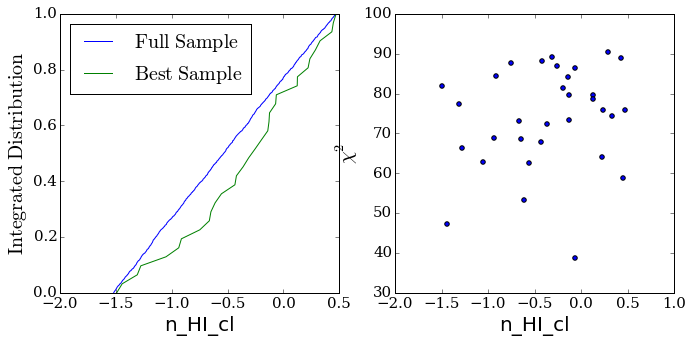

----
r_cl
0.706767369136
[  56.935528   92.119705  139.72222 ]


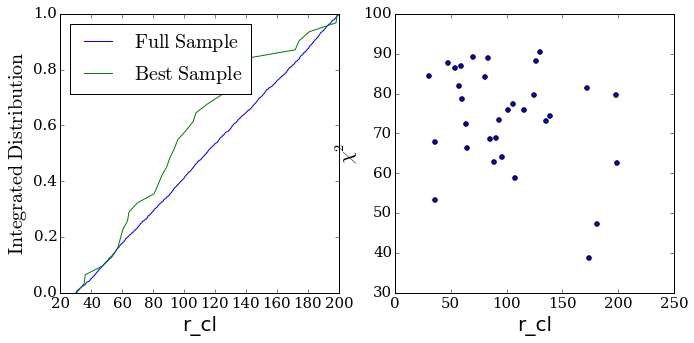

----
sigma_cl
0.382061636609
[ 59.0939192  70.75389    83.5693508]


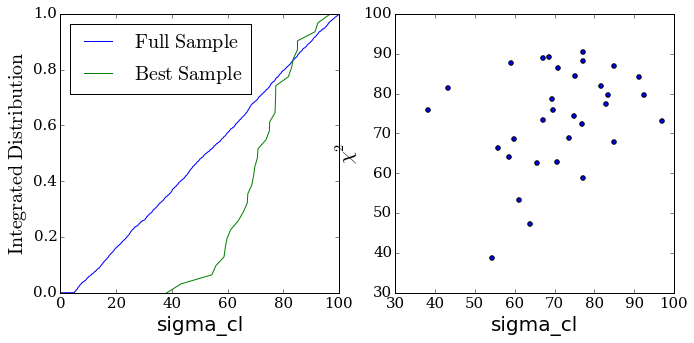

----
sigma_i
0.988921733293
[ 28.0464932  55.654155   91.2844356]


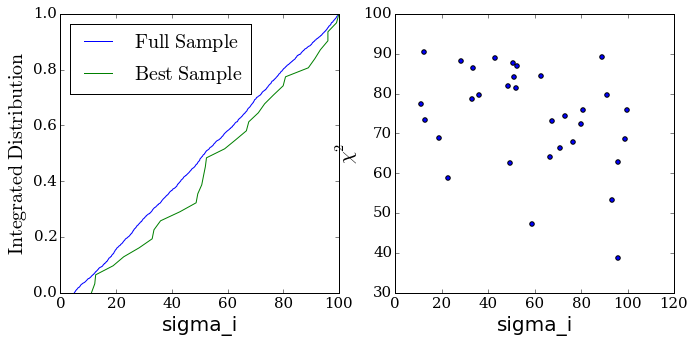

----
vinf_cl
0.191331991294
[  18.449286   54.824225  122.306544]


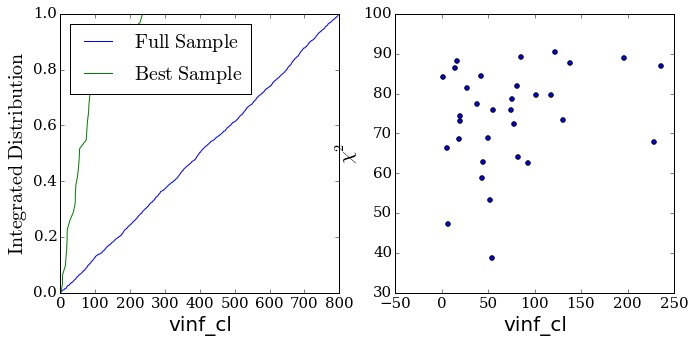

----
zeta_Z
0.949110882247
[-3.3896605  -2.39731162 -1.4381586 ]


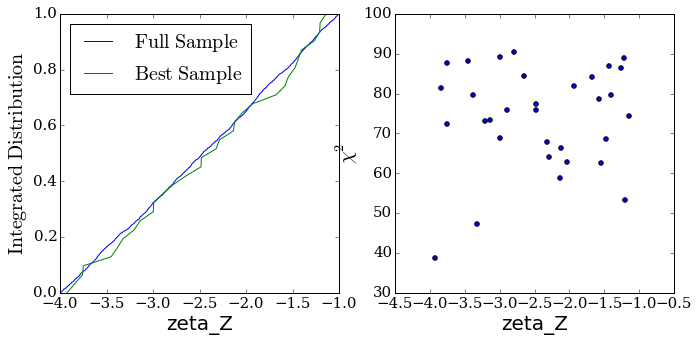

In [18]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
for column in data:
    if column in column_log:
        print "----"
        print column
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        plot_distros(np.log10(data[column].values), np.log10(best_models[column].values), 
                     best_models['chisq'].values, column)
    if column in column_lin:
        print "----"
        print column
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        plot_distros((data[column].values), (best_models[column].values),
                     best_models['chisq'].values, column)
        #print column


In [19]:
ii = argsort(change)
for i in ii:
    print columns[i], values[i], change[i]

vinf_cl [  18.449286   54.824225  122.306544] 0.191331991294
sigma_cl [ 59.0939192  70.75389    83.5693508] 0.382061636609
r_cl [  56.935528   92.119705  139.72222 ] 0.706767369136
f_cl [ 3.08700867  4.70777573  6.89958623] 0.77633684288
T_ICM [ 6.03170367  6.73426455  7.24634127] 0.810422845773
P_cl [ 0.33503442  0.7722822   0.92086156] 0.856556666669
H_em [ 1135.6203   1794.3755   2626.77436] 0.875799393021
n_HI_cl [-0.9426244  -0.28183508  0.23858552] 0.87754384521
T_cl [ 3.89090635  4.31730433  4.5050795 ] 0.910950433955
n_HI_ICM [-10.9681448   -8.7413954   -7.16445929] 0.929274197355
zeta_Z [-3.3896605  -2.39731162 -1.4381586 ] 0.949110882247
sigma_i [ 28.0464932  55.654155   91.2844356] 0.988921733293
beta_cl [ 1.2096  1.77    2.2   ] 1.03166666667


In [22]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u
sigma_clouds= array([ 59.0939192 , 70.75389  ,  83.5693508, 100])

r = 5.0 * kpc.to('cm')
print r
sigma = sigma_clouds * u.kilometer / u.second
print sigma
dynamical_mass = r * sigma **2 / (2.0*G.cgs)
dynamical_mass.to('M_sun')

1.54283879073e+22 cm
[  59.0939192   70.75389     83.5693508  100.       ] km / s


<Quantity [  2.02928822e+09,  2.90910094e+09,  4.05837527e+09,
             5.81109728e+09] solMass>

```
Results for N=5 best
vinf_cl [ 29.97683736  52.46892     68.2785068 ] 0.0705616037335
n_HI_ICM [-7.58195352 -7.16473233 -7.13761982] 0.108554674233
sigma_cl [ 58.6195304  63.78155    69.8165004] 0.174784770016
T_ICM [ 6.52337985  6.6649067   6.8597901 ] 0.22445752282
f_cl [ 2.04778051  3.01804366  3.50512314] 0.29675167451

H_em [ 1481.18168  1771.094    2281.33804] 0.469955769969
T_cl [ 4.03613616  4.20752342  4.40656762] 0.54942926117

beta_cl [ 1.42    1.6     2.1032] 0.711666666667
n_HI_cl [-0.77192707 -0.55615865  0.19269761] 0.716638456542
P_cl [ 0.29926839  0.7993842   0.86945951] 0.83369472852
sigma_i [ 39.7198884  58.911      94.1873172] 0.851767499901
r_cl [  81.7922428  174.0811     187.0983   ] 0.899019917372
zeta_Z [-3.4624546  -2.13765501 -1.39212802] 1.00690113898


Results for best N=10 
vinf_cl [ 11.77492296  48.606605    88.2894364 ] 0.140959567981
sigma_cl [ 57.0310768  62.41034    74.3336384] 0.270093092145
T_ICM [ 6.42311563  6.67298056  6.97551694] 0.368569716575
n_HI_ICM [-9.22481664 -8.04416023 -7.16092528] 0.504227014347
zeta_Z [-2.62977871 -2.13155433 -1.50638592] 0.546360892923

sigma_i [ 53.517276  73.72816   95.91985 ] 0.6630960051
f_cl [ 2.75050651  4.31840369  6.33245614] 0.729375186298
T_cl [ 3.79169646  4.16784231  4.33223337] 0.801732094508
beta_cl [ 1.348   1.84    2.1316] 0.81625

H_em [ 1151.44036  1711.0505   2567.0448 ] 0.831426840839
P_cl [ 0.24329905  0.78809165  0.8143268 ] 0.834917995006
n_HI_cl [-1.16447244 -0.58346042  0.11720057] 0.952179834709
r_cl [  48.5231096   92.220695   177.731348 ] 1.1030778561

Results for best N=15

vinf_cl [ 18.7711492  49.66307    90.4487244] 0.132048673903
sigma_cl [ 58.9402688  67.01852    77.1646388] 0.284482526893
f_cl [ 3.03528492  4.49425009  5.99339146] 0.602345017725
T_ICM [ 6.13373144  6.68090706  7.19195491] 0.70606119688

n_HI_ICM [-10.62672789  -8.2248358   -7.2184682 ] 0.832668152695

r_cl [  63.6046088   93.53885    165.516676 ] 0.870044712237
zeta_Z [-3.29358593 -2.28724828 -1.49247934] 0.875966280042
n_HI_cl [-1.02255957 -0.55615865  0.16716718] 0.883871163017
H_em [ 1149.72156  1771.094    2696.42284] 0.908423937235
T_cl [ 3.83845661  4.20752342  4.50145978] 0.983375817919
sigma_i [ 29.0982644  70.975      95.2677252] 1.0347651328
beta_cl [ 1.258   1.8     2.2636] 1.0475
P_cl [ 0.18732971  0.7922047   0.9320748 ] 1.0889156849
```

In [229]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
n_points = 100
z = 0.0
mass = logspace(9,12,n_points)
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * pi * rho_virial))**(1./3)
#print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print Tvir.to('Kelvin')

[]

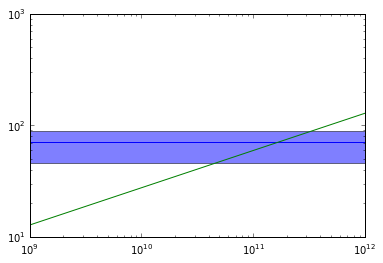

In [230]:
sigma_clouds= array([ 46.3522264 , 71.647375 ,  88.3027644])
y_up = ones(n_points) * sigma_clouds[2]
y_down = ones(n_points) * sigma_clouds[0]
y_center = ones(n_points) * sigma_clouds[1]
fill_between(mass, y_up, y_down, facecolor='blue', alpha=0.5)
plt.plot(mass, y_center)
plt.plot(mass, vcirc.to('km/s'))
plt.loglog()


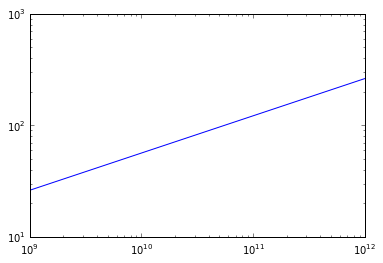

In [231]:
plt.loglog()
plt.plot(mass, rvir.to('kpc'))